In [1]:
# pip install
!pip install datasets torch transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 3.6 MB/s eta 0:00:00


In [2]:
!wget https://storage.googleapis.com/quickdraw_dataset/full/simplified/apple.ndjson

--2023-03-23 05:37:41--  https://storage.googleapis.com/quickdraw_dataset/full/simplified/apple.ndjson
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 142.250.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58819094 (56M) [application/octet-stream]
Saving to: ‘apple.ndjson’

apple.ndjson        100%[===================>]  56.09M  85.2MB/s    in 0.7s    

2023-03-23 05:37:42 (85.2 MB/s) - ‘apple.ndjson’ saved [58819094/58819094]



In [3]:
!head -n 10 apple.ndjson

{"word":"apple","countrycode":"US","timestamp":"2017-03-10 22:17:57.57466 UTC","recognized":false,"key_id":"6420579601088512","drawing":[[[255,255],[0,0]],[[255,255],[0,0]],[[255,255],[0,0]],[[255,254],[0,1]],[[131,124,114,69,37,10,0,0,5,16,31,50,68,86,101,115,126,135,137,135,122,106],[50,39,39,59,89,127,172,194,215,233,244,249,249,241,225,203,174,143,114,88,65,45]],[[84,77,81,88,99,122,138,161,180],[97,85,52,34,18,4,1,2,12]]]}
{"word":"apple","countrycode":"RU","timestamp":"2017-03-08 06:29:44.16282 UTC","recognized":true,"key_id":"4986110117675008","drawing":[[[95,79,68,31,17,9,1,0,4,54,103,130,168,190,204,219,228,222,210,200,194,197,203,192,189,190,209,207,197,179,107,100],[62,50,49,74,91,113,163,220,226,249,255,255,244,231,215,187,152,151,160,160,156,140,137,134,115,109,88,82,71,63,62,65]],[[100,100,104,110,115,115,108,107],[58,17,1,0,12,22,44,64]]]}
{"word":"apple","countrycode":"GB","timestamp":"2017-03-10 12:41:33.39063 UTC","recognized":true,"key_id":"6489082920173568","drawing

In [37]:
!grep apple apple.ndjson | head -n 10000 > apple_simplified.ndjson

<PIL.Image.Image image mode=RGB size=256x256 at 0x7F2E6866DEB0>


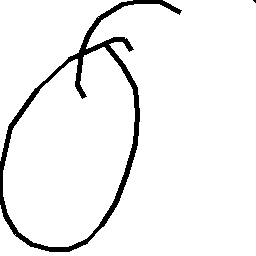

In [38]:
import json
from PIL import Image, ImageDraw

# Load the simplified drawing data into a list
with open('apple_simplified.ndjson') as f:
    data = [json.loads(line) for line in f]

# Define a function to convert drawing data to image format arrays
def drawing_to_image(data):
    # Extract the image data and label
    image_data = data['drawing']
    label = data['word']
        
    # Create a new image
    img = Image.new('RGB', (256, 256), (255, 255, 255))
    draw = ImageDraw.Draw(img)
        
    # Draw the path on the image
    for stroke in data['drawing']:
        # print("stroke:",stroke)
        for i in range(len(stroke[0])-1):
            draw.line((stroke[0][i], stroke[1][i], stroke[0][i+1], stroke[1][i+1]), fill='black', width=5)
    return img

# Convert the drawing data to image format arrays
test_images = [drawing_to_image(d) for d in data]

print(test_images[0])
test_images[0]

In [39]:
# import the imagenette dataset
from datasets import load_dataset

imagenette = load_dataset(
    'frgfm/imagenette',
    '320px',
    split='validation',
    revision="4d512db"
)
# show dataset info
imagenette

Dataset({
    features: ['image', 'label'],
    num_rows: 3925
})

In [40]:
print(imagenette[0]['image'])

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=328x320 at 0x7F2F843BAD30>


In [41]:
# check labels in the dataset
set(imagenette['label'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [42]:
# labels names 
labels = imagenette.info.features['label'].names
labels

['tench',
 'English springer',
 'cassette player',
 'chain saw',
 'church',
 'French horn',
 'garbage truck',
 'gas pump',
 'golf ball',
 'parachute']

In [43]:
labels.append('apple')

In [98]:
labels=[
                                "shoe",
                                "crown",
                                "clock",
                                "dog",
                                "apple",
                                "flower",
                                "horse",
                                "sword",
                                "bird",
                                "tree",
                                "snowflake",
                                "castle",
                                "lion",
                                "rainbow",
                                "lollipop"]

In [99]:
# generate sentences
clip_labels = [f"a photo of a {label}" for label in labels]
clip_labels

['a photo of a shoe',
 'a photo of a crown',
 'a photo of a clock',
 'a photo of a dog',
 'a photo of a apple',
 'a photo of a flower',
 'a photo of a horse',
 'a photo of a sword',
 'a photo of a bird',
 'a photo of a tree',
 'a photo of a snowflake',
 'a photo of a castle',
 'a photo of a lion',
 'a photo of a rainbow',
 'a photo of a lollipop']

In [100]:
# initialization
from transformers import CLIPProcessor, CLIPModel

model_id = "openai/clip-vit-base-patch32"

processor = CLIPProcessor.from_pretrained(model_id)
model = CLIPModel.from_pretrained(model_id)

In [101]:
import torch

# if you have CUDA set it to the active device like this
device = "cuda" if torch.cuda.is_available() else "cpu"
# move the model to the device
model.to(device)

device

'cuda'

In [102]:
# create label tokens
label_tokens = processor(
    text=clip_labels,
    padding=True,
    images=None,
    return_tensors='pt'
).to(device)

label_tokens['input_ids'][0][:10]

tensor([49406,   320,  1125,   539,   320,  7342, 49407], device='cuda:0')

In [103]:
# encode tokens to sentence embeddings
label_emb = model.get_text_features(**label_tokens)
# detach from pytorch gradient computation
label_emb = label_emb.detach().cpu().numpy()
label_emb.shape

(15, 512)

In [104]:
label_emb.min(), label_emb.max()

(-1.8483621, 6.392812)

In [105]:
import numpy as np

# normalization
label_emb = label_emb / np.linalg.norm(label_emb, axis=0)
label_emb.min(), label_emb.max()

(-0.7704727, 0.7794923)

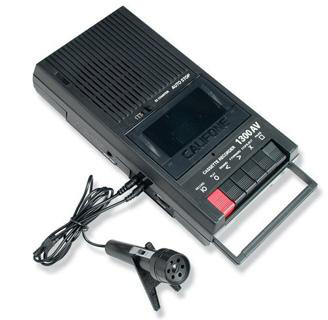

In [106]:
imagenette[0]['image']

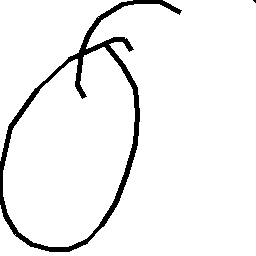

In [107]:
test_images[0]

In [108]:
image = processor(
    text=None,
    images=imagenette[0]['image'],
    return_tensors='pt'
)['pixel_values'].to(device)
image.shape

torch.Size([1, 3, 224, 224])

In [109]:
test_image = processor(
    text=None,
    images=test_images[0],
    return_tensors='pt'
)['pixel_values'].to(device)
image.shape

torch.Size([1, 3, 224, 224])

In [110]:
img_emb = model.get_image_features(image)
img_emb.shape

torch.Size([1, 512])

In [111]:
test_img_emb = model.get_image_features(test_image)
test_img_emb.shape

torch.Size([1, 512])

In [112]:
img_emb = img_emb.detach().cpu().numpy()

In [113]:
test_img_emb = test_img_emb.detach().cpu().numpy()

In [114]:
scores = np.dot(img_emb, label_emb.T)
scores.shape

(1, 15)

In [115]:
test_scores = np.dot(test_img_emb, label_emb.T)
test_scores.shape

(1, 15)

In [116]:
# get index of highest score
pred = np.argmax(scores)
pred

3

In [117]:
# get index of highest score
test_pred = np.argmax(test_scores)
test_pred

4

In [118]:
# find text label with highest score
labels[pred]

'dog'

In [119]:
# find text label with highest score
labels[test_pred]

'apple'

In [120]:
# from tqdm.auto import tqdm

# preds = []
# batch_size = 32

# for i in tqdm(range(0, len(imagenette), batch_size)):
#     i_end = min(i + batch_size, len(imagenette))
#     images = processor(
#         text=None,
#         images=imagenette[i:i_end]['image'],
#         return_tensors='pt'
#     )['pixel_values'].to(device)
#     img_emb = model.get_image_features(images)
#     img_emb = img_emb.detach().cpu().numpy()
#     scores = np.dot(img_emb, label_emb.T)
#     preds.extend(np.argmax(scores, axis=1))

In [121]:
from tqdm.auto import tqdm

preds = []
batch_size = 32

for i in tqdm(range(0, len(test_images), batch_size)):
    i_end = min(i + batch_size, len(test_images))
    images = processor(
        text=None,
        images=test_images[i:i_end],
        return_tensors='pt'
    )['pixel_values'].to(device)
    img_emb = model.get_image_features(images)
    img_emb = img_emb.detach().cpu().numpy()
    scores = np.dot(img_emb, label_emb.T)
    preds.extend(np.argmax(scores, axis=1))

  0%|          | 0/313 [00:00<?, ?it/s]

In [122]:
print(preds)

[4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 11, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 14, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 14, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 14, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 14, 4, 4, 4, 4, 4, 6, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 14, 4, 4, 4, 14, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 14, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 14, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 14, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 14, 0, 4, 4, 14, 4, 4, 4, 4, 5, 4, 4, 7, 4, 4, 4, 10, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [123]:
# true_preds = []
# for i, label in enumerate(imagenette['label']):
#     if label == preds[i]:
#         true_preds.append(1)
#     else:
#         true_preds.append(0)

# sum(true_preds) / len(true_preds)

In [125]:
true_preds = []
# for i, label in enumerate(imagenette['label']):
#     if label == preds[i]:
#         true_preds.append(1)
#     else:
#         true_preds.append(0)

for pred in preds:
  if pred == 4:
    true_preds.append(1)
  else:
    true_preds.append(0)

sum(true_preds) / len(true_preds)

0.9124